In [1]:
from google.colab import files
upload=files.upload()


Saving Housing.csv to Housing.csv


In [2]:
#import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#import Data_Sets
df=pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Housing Prices Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#Data Describes
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [7]:
#Checking Missing Values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

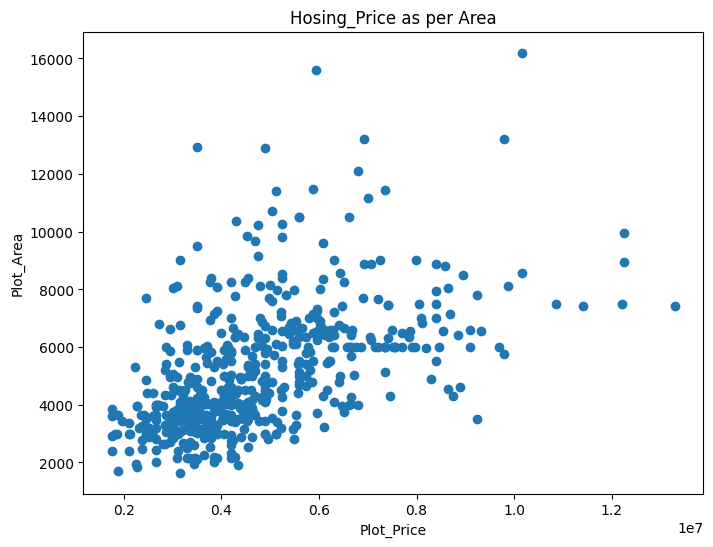

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x='price',y='area',data=df)
plt.xlabel("Plot_Price")
plt.ylabel("Plot_Area")
plt.title("Hosing_Price as per Area")
plt.show()

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
Categorical_Col = []
Numerical_Col = []

In [11]:
for col in df.columns:
  if df[col].dtype=='object':
    Categorical_Col.append(col)
  else:
    Numerical_Col.append(col)


In [12]:
print(Categorical_Col)
print(Numerical_Col)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [13]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [15]:
#OneHotEncoder
df=pd.get_dummies(df)



In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0


In [17]:
df.shape

(545, 19)

"""Column Name:  mainroad Unique Values:  ['yes' 'no']

Column Name:  guestroom Unique Values:  ['no' 'yes']

Column Name:  basement Unique Values:  ['no' 'yes']

Column Name:  hotwaterheating Unique Values:  ['no' 'yes']

Column Name:  airconditioning Unique Values:  ['yes' 'no']

Column Name:  prefarea Unique Values:  ['yes' 'no']

Column Name:  furnishingstatus Unique Values:  ['furnished' 'semi-furnished' 'unfurnished']"""

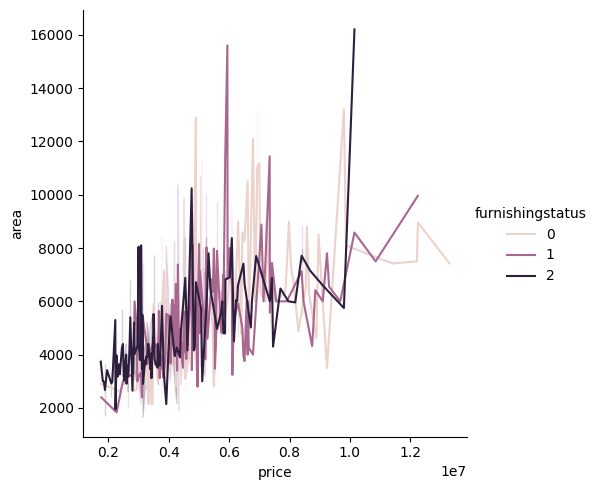

In [18]:
sns.relplot(
    data=df, kind="line",
    x="price", y="area",
    hue="furnishingstatus")


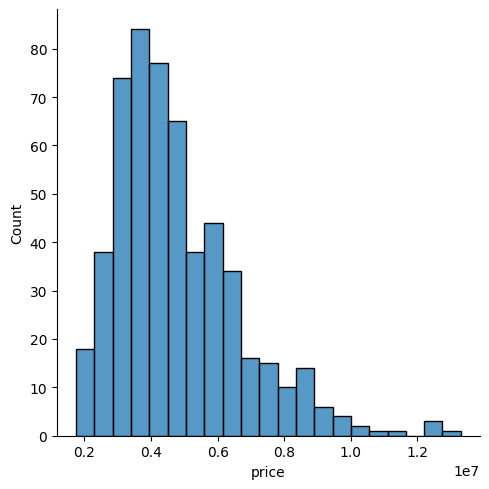

In [21]:
sns.displot(df['price'])


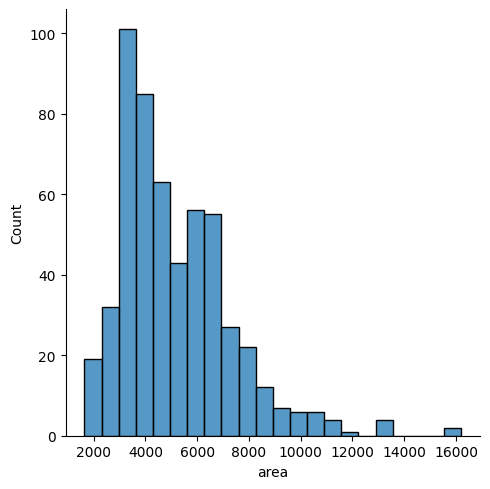

In [23]:
sns.displot(df['area'])

<Axes: >

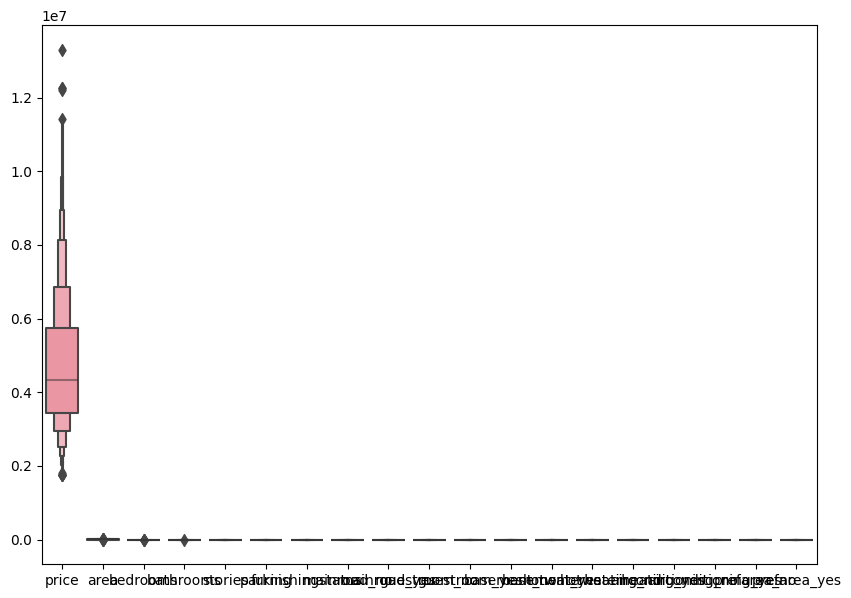

In [24]:
plt.figure(figsize=(10,7))
sns.boxenplot(df)

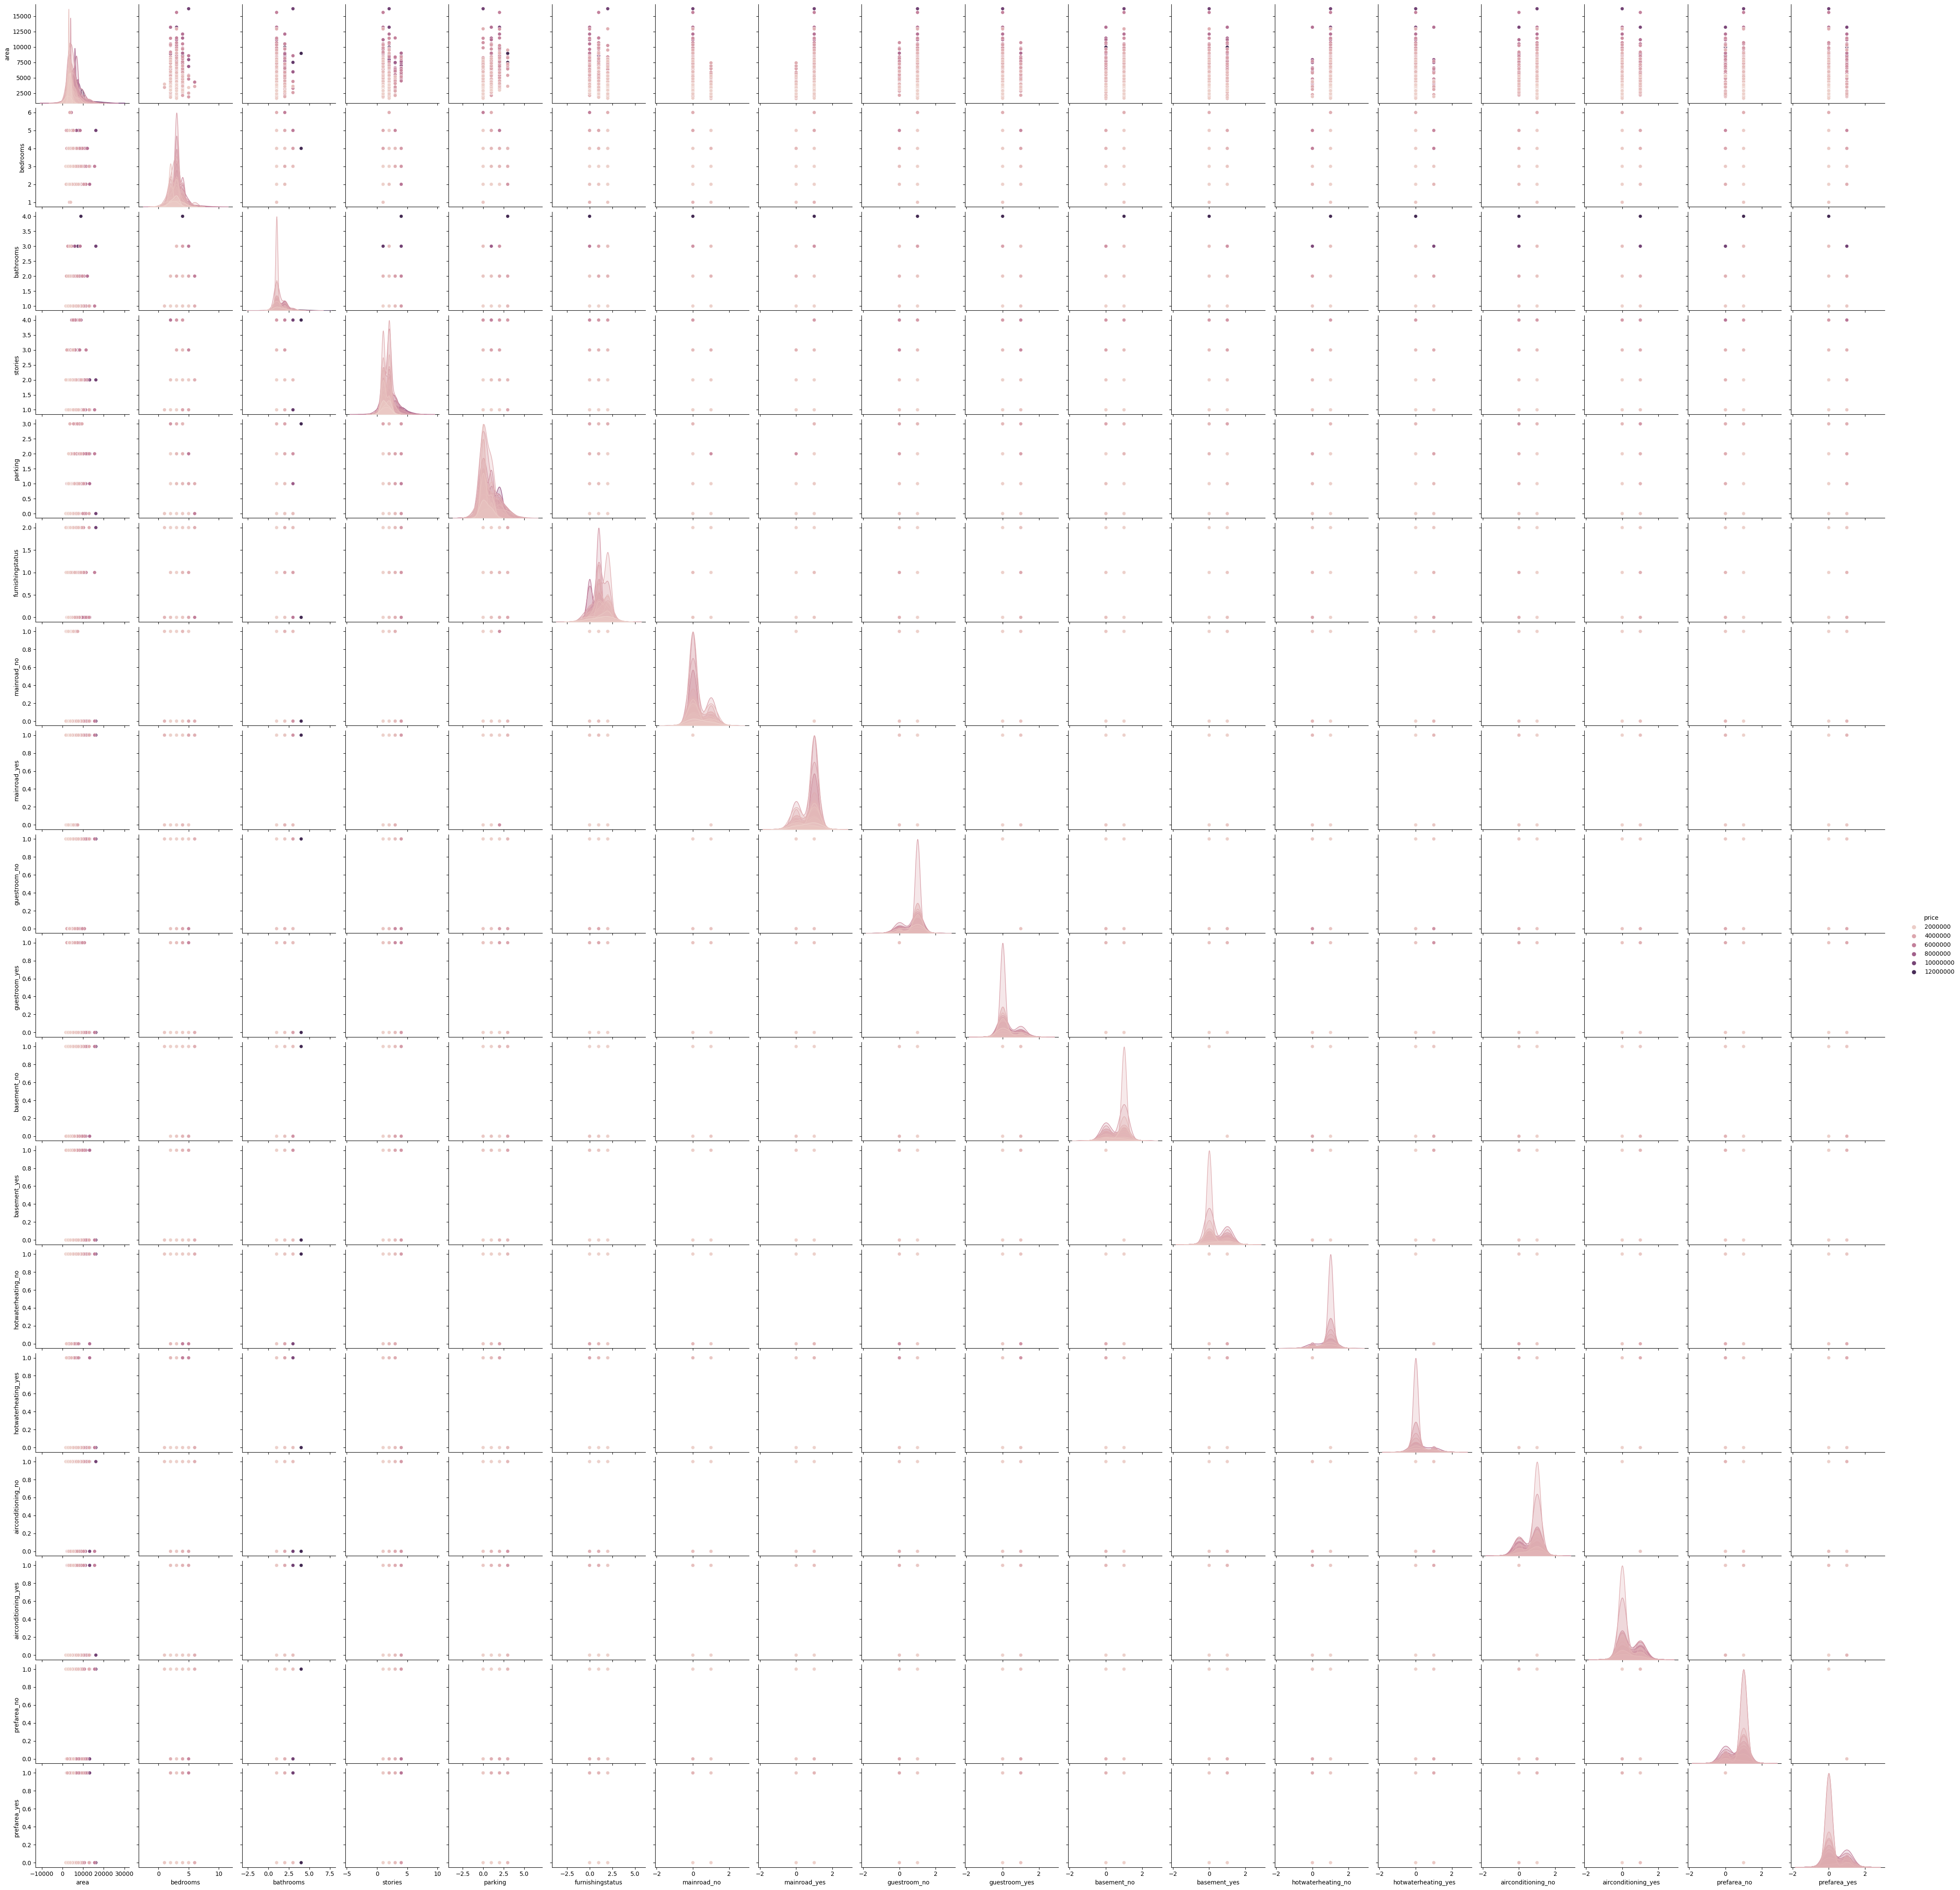

In [25]:
sns.pairplot(data=df, hue='price')
plt.show()


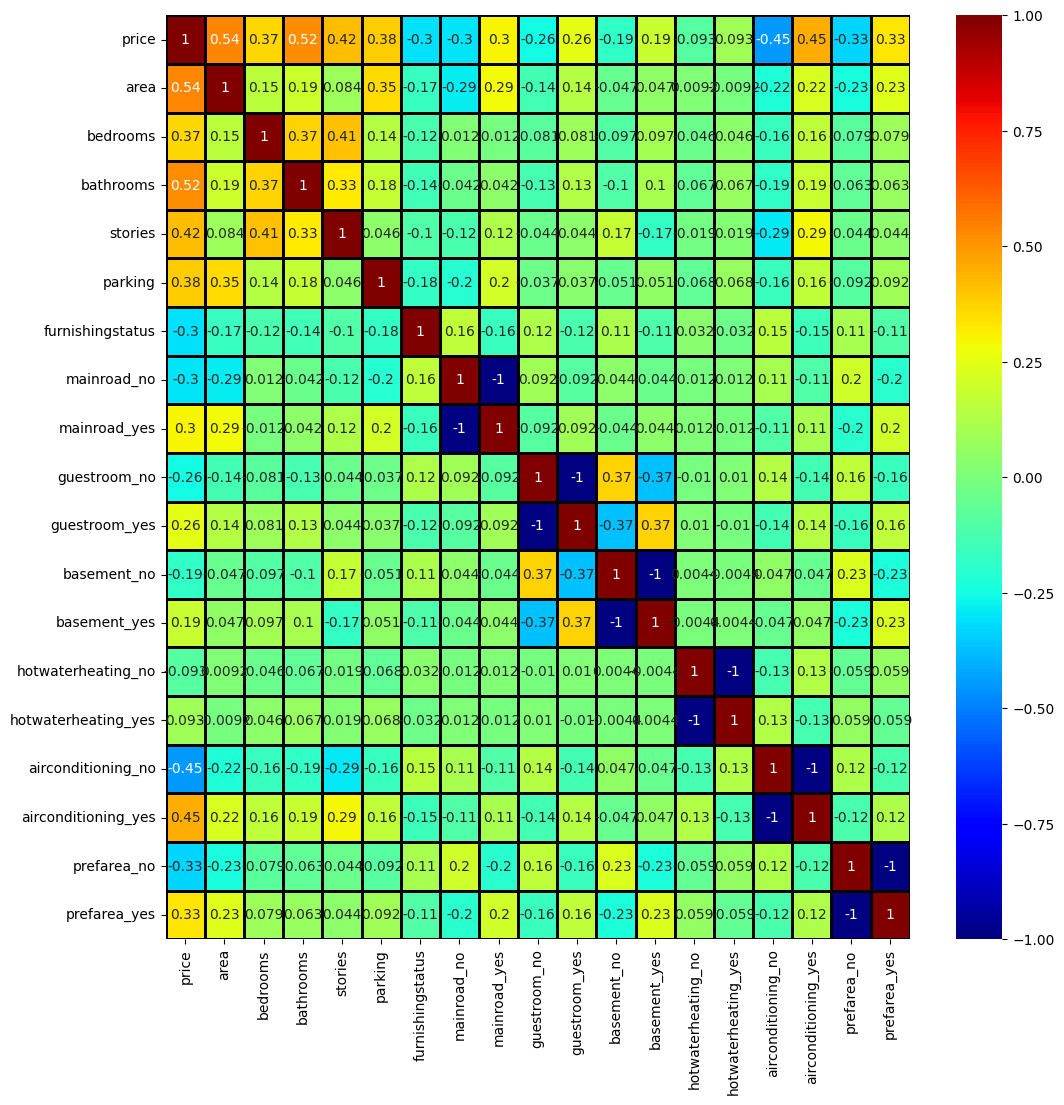

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linecolor='black', linewidths=1, cmap='jet')
plt.show()

In [27]:
#Train&Test Split

from sklearn.model_selection import train_test_split

In [28]:
features =df.drop(['price'],axis=1)
y=df['price']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(features,y,train_size=0.80,random_state=889)

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((436, 18), (436,), (109, 18), (109,))

***Feature Scaling**¶


In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()


In [34]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()

In [38]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [39]:
pred_lr=model_lr.predict(x_train)


In [40]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(pred_lr,y_train)

774272.115083333

In [42]:
mean_squared_error(pred_lr,y_train)

1110157649242.0427

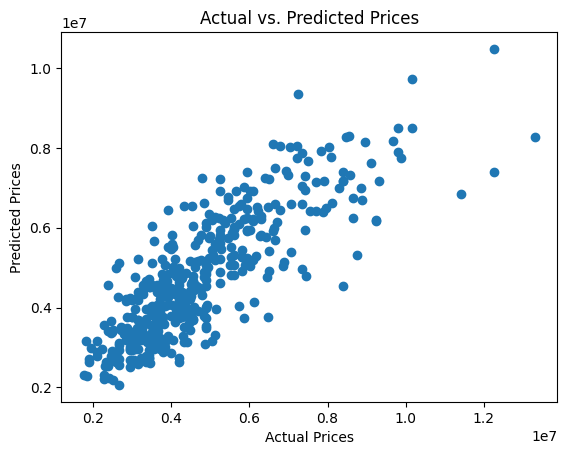

In [46]:
plt.scatter(y_train,pred_lr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()